# Business Understanding

## Context

Dataset California Housing merupakan kumpulan data hasil survey kependudukan yang dilakukan pada tahun 1990 tentang hunian penduduk di seluruh California.

## Problem Statement

Memiliki rumah adalah impian setiap orang. Namun, kegiatan jual-beli rumah bukanlah hal yang mudah karena ada banyak hal yang perlu diperhatikan seperti harga pasaran rumah di sekitarnya. Mendapatkan rumah dengan harga terjangkau tentu akan menguntungkan bagi pembeli, namun ini akan merugikan penjual karena seharusnya rumah tersebut dapat bernilai lebih. Sedangkan menawarkan rumah dengan nilai yang berada jauh di atas harga pasaran akan membuat pembeli berpikir dua kali dan membuat proses jual-beli menjadi terhambat. Oleh sebab itu, penting sekali untuk mengetahui harga pasaran rumah di sebuah kawasan sebelum membutuskan untuk menjual atau membeli sebuah rumah.

## Goals

Memprediksi harga rumah di California berdasarkan kawasan perumahan di sekitarnya

# Analytical Approach

Untuk dapat mengetahui harga pasaran sebuah rumah di California, maka setidaknya diperlukan informasi tentang:

Kawasan dan lingkungan:
Population
Households
Housing Median Age
Median Income

Kondisi rumah:
Longitude
Latitude
Ocean Proximity
Total Rooms
Total Bedrooms

## Modelling

Untuk memperkirakan harga rumah, maka teknik pemodelan yang akan diterapkan adalah regresi dengan model-model sebagai berikut:

Linear Regression
Decision Tree Regressor
KNN Regresser
Random Forest
XGBoost Regressor

## Metric Evaluation

Untuk mengevaluasi model yang dibuat, maka metric yang akan digunakan adalah:

1. RMSE: untuk mengukur standar deviasi residu dari hasil prediksi dengan nilai sebenrarnya
2. MAE: alternatif untuk data dengan banyak outlier di residu
3. RMSLE: pengukuran rmse dalam skala logaritmik karena rentang nilai prediksi nya besar, dalam skala ratusan ribu USD
4. MAPE: mengukur relative error dalam persen

## Feature

In [232]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [233]:
df = pd.read_csv('data_california_house.csv');
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [234]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [235]:
df.dropna(inplace=True)

In [236]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

mengecek apakah ada data yang kosong, dan dilakukan penghapusan untuk data yang kosong

In [237]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [238]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.0,806,"[-122.03, -123.74]"
1,latitude,float64,0,0.0,835,"[34.34, 37.41]"
2,housing_median_age,float64,0,0.0,52,"[37.0, 44.0]"
3,total_rooms,float64,0,0.0,5213,"[508.0, 7916.0]"
4,total_bedrooms,float64,0,0.0,1748,"[15.0, 328.0]"
5,population,float64,0,0.0,3491,"[2681.0, 627.0]"
6,households,float64,0,0.0,1646,"[524.0, 841.0]"
7,median_income,float64,0,0.0,9726,"[1.8429, 1.8238]"
8,ocean_proximity,object,0,0.0,5,"[ISLAND, NEAR BAY]"
9,median_house_value,float64,0,0.0,3540,"[431800.0, 316900.0]"


Dari info dataset di atas, terdapat data yang kosong pada beberapa fitur atau kolom. Selanjutnya, kita perlu mengobservasi lebih lanjut terkait data-data yang hilang tersebut agar dapat menentukan langkah treatment yang tepat untuk mengatasinya.

In [239]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'object'))]
df[num_features].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Data di atas merupakan deskripsi dari masing-masing feature, untuk kita melihat seperti mean, nilai tertinggi, nilai terendah, dll

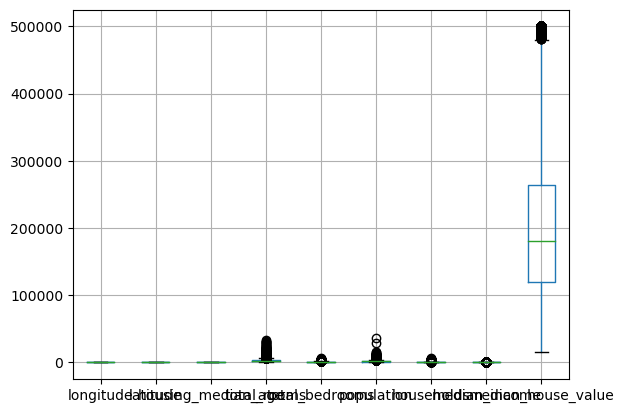

In [240]:
df.boxplot();

Dari boxplot diatas terlihat cukup banyak outliers pada beberapa feature

In [241]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [242]:
find_anomalies(df['housing_median_age'])

IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5


In [243]:
find_anomalies(df['total_rooms'])

IQR: 1690.0
limit_bawah: -1083.0
limit_atas: 5677.0


In [244]:
df['total_bedrooms'].describe()

count    14311.000000
mean       538.260709
std        423.577544
min          1.000000
25%        295.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [245]:
find_anomalies(df['total_bedrooms'])

IQR: 352.0
limit_bawah: -233.0
limit_atas: 1175.0


In [246]:
find_anomalies(df['households'])

IQR: 324.5
limit_bawah: -207.75
limit_atas: 1090.25


In [247]:
find_anomalies(df['median_income'])

IQR: 2.1667000000000005
limit_bawah: -0.6806500000000009
limit_atas: 7.986150000000001


In [248]:
find_anomalies(df['median_house_value'])

IQR: 144350.0
limit_bawah: -97125.0
limit_atas: 480275.0


In [249]:
df['median_house_value'].describe()

count     14311.000000
mean     206793.156942
std      115404.371629
min       14999.000000
25%      119400.000000
50%      180000.000000
75%      263750.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [250]:
df = df[df['households'] <= 982]

In [251]:
df = df[df['total_rooms'] <= 5677]

In [252]:
df = df[df['total_bedrooms'] <= 1175]

In [253]:
df = df[df['median_house_value'] <= 480275.0]

Setelah melihat outliers dan pengecekan anomali dari masing-masing feature, saya membershikan dengan memfilter beberapa filter dengan value <= (kurang dari sama dengan) limit atas masing-masing feature

In [254]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import RobustScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [255]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [256]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=1)

In [257]:
transformer = ColumnTransformer([
    ('Binary', ce.BinaryEncoder(), ['ocean_proximity'])
], remainder='passthrough')

Encoding dilakukan untuk merubah feature kategorik menjadi numerik, disini saya menggunakan binary encoder

In [261]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Scaling data
scaler = RobustScaler()

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )
    
    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )
    
    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

In [262]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-58828.646929,1001.859814,-43801.263626,332.603727,-0.275486,0.002470
1,KNN Regressor,-55553.602130,1543.425829,-39055.139277,998.601389,-0.231012,0.005014
2,DecisionTree Regressor,-67055.175915,1979.247286,-45011.936751,1005.875170,-0.265356,0.007086
3,RandomForest Regressor,-46649.826255,1600.446217,-31944.604915,968.287493,-0.193019,0.004878
4,XGBoost Regressor,-44834.682804,1556.303458,-30344.923671,718.059943,-0.182206,0.004334


Berdasarkan hasil dari Benchamarking model diatas terdapat 3 yang terbaik: Linear Regression, RandomForest, dan XGB.

Dan selanjutkan akan dilakukan prediksi dengan 3 model terbaik tersebut

In [263]:
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1),
    'LinearRegression': LinearRegression()
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,44427.252093,30324.300119,0.187140
RandomForest,46445.467940,31608.798487,0.191318
LinearRegression,58260.035402,42214.844662,0.263748


Ketika dilakukan benchamarking dengan 3 model terbaik, XGB adalah model terbaik terlihat dari RMSE, MAE, dan MAPE

In [264]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

Karena XGB memiliki performa terbaik pada dataset ini, maka hyperparameter tuning dilakukan dengan menggunakan model XGBoost sebagai model akhir. 

Panduan tuning, merujuk pada dokumentasi yang ada di web XGBoost

https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

In [265]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [266]:
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Binary',
                                                                               BinaryEncoder(),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=N...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [267]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,1.926936,0.065230,0.035356,0.003028,0.9,0.059948,119,8,0.05,5,...,819.294816,1,-0.174843,-0.176294,-0.177065,-0.174641,-0.187779,-0.178124,0.004911,1
20,0.794535,0.027194,0.029453,0.003159,0.9,0.007743,143,4,0.38,6,...,689.992007,2,-0.184976,-0.195038,-0.193848,-0.187207,-0.196966,-0.191607,0.004666,2
17,1.415837,0.046795,0.037295,0.004441,0.6,0.001,190,5,0.04,9,...,692.433270,3,-0.189410,-0.193574,-0.190089,-0.190369,-0.201592,-0.193007,0.004526,3
8,1.097334,0.045969,0.032098,0.003965,0.7,0.021544,182,6,0.31,2,...,801.361541,4,-0.197668,-0.195407,-0.192974,-0.200699,-0.197262,-0.196802,0.002559,4
43,1.173718,0.046699,0.039784,0.001925,0.5,0.16681,172,5,0.31,7,...,823.857755,5,-0.195351,-0.200896,-0.200526,-0.195306,-0.201886,-0.198793,0.002864,5


In [268]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -43174.757420110654
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


In [269]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,42795.280195,28980.575994,0.178291


In [270]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,44427.252093,30324.300119,0.18714


In [271]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,42795.280195,28980.575994,0.178291


2 data diatas adalah perbandingan model sebelum dan setelah di tunning. Terdapat peningkatan performa sedikit setelah dilakukan hyperparameter tunning

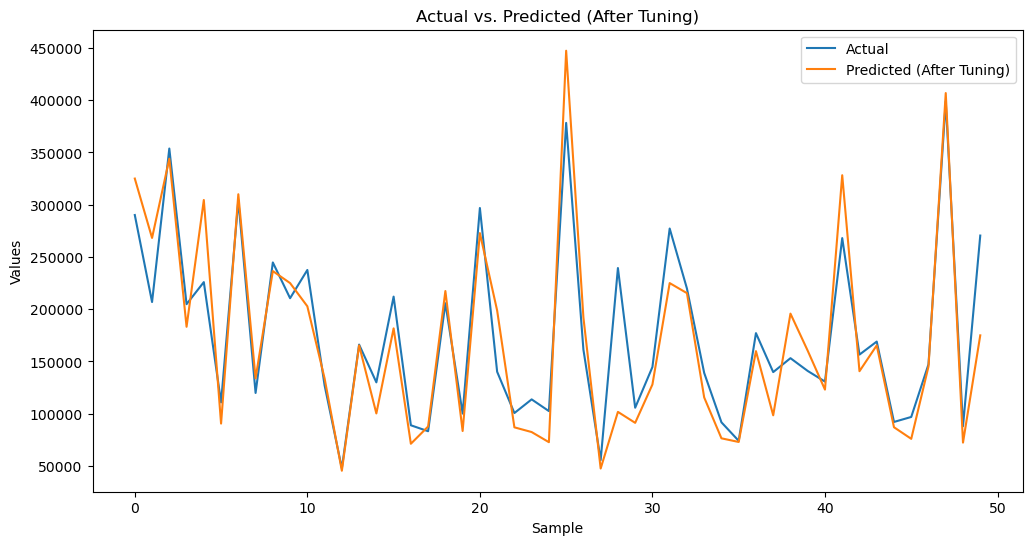

In [274]:
test_after_tuning = pd.DataFrame({'Predicted (After Tuning)': y_pred_xgb_tuning, 'Actual': y_test})

test_after_tuning = test_after_tuning.reset_index()
test_after_tuning = test_after_tuning.drop(['index'], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(test_after_tuning[:50])
plt.title('Actual vs. Predicted (After Tuning)')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.legend(['Actual', 'Predicted (After Tuning)'])
plt.show()

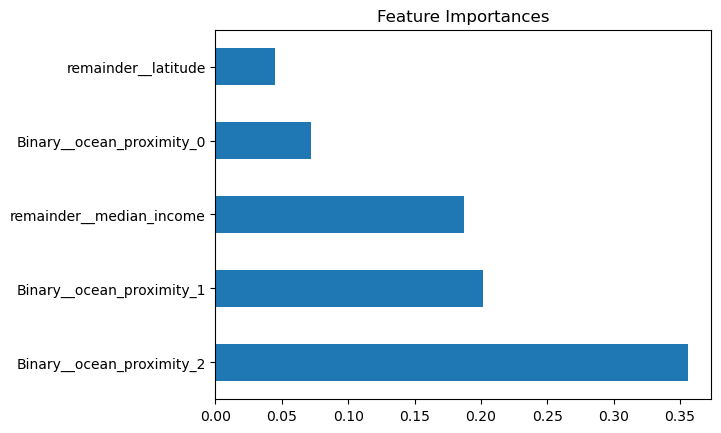

In [273]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

Ini adalah feature yang sangat mempengarahui target

# Kesimpulan

1. Algoritma yang digunakan untuk melakukan cross validation yaitu menggunakan model Linear Regression, K-Nearest Neighbor, Random Forest Regressor, Decision Tree Regressor, Extreme Gradient Boosting (XGBoost).
2. Metrik yang digunakan untuk melakukan cross validation yaitu dengan RMSE, MAE, MAPE.
3. Setelah dilakukan benchmark model dengan cross validation menunjukkan bahwa terdapat dua algoritma yang menunjukkan nilai rata-rata dan standar deviasi dari RMSE, MAE dan MAPE yang paling kecil yaitu model XGBoost, Random Forest, Linear Regression.
4. Berdasarkan dari hasil predict test set dengan benchmark model, model XGBoost memiliki nilai paling kecil daripada Random Forest dan Linear Regression yaitu sebesar 44427.252093 untuk RMSE, 30324.300119 untuk MAE dan 0.187140 untuk MAPE.
5. Setelah memilih XGBoost sebagai model terbaik, dilakukan hyperparameter tuning, dan mendapatkan hasil yang lebih baik yaitu sebesar 42795.280195	untuk RMSE, 28980.575994 untuk MAE, dan	0.178291 untuk MAPE

# Rekomendasi

## For Model:

1. Mempertimbangkan faktor eksternal yang dapat berdampak pada pasaran harga rumah di California. Seperti suku bunga, rata-rata pendapatan, dan lain sebagainya.
2. Memperluas dataset dengan mengumpulkan lebih banyak data yang memiliki informasi relevan untuk meningkatkan performa model machine learning sehingga dapat menghasilkan akurasi model prediksi yang lebih baik dan membantu meningkatkan model regresi yang bertujuan untuk memperlajari pola-pola dalam data.
3. Menambahkan feature-feature yang berhubungan kuat terhadap harga rumah di California seperti
Mencoba untuk menggunakan algoritma machine learning lain untuk dapat membandingkan performance dari masing-masing model lainnya.

## For Bussiness:


1. Memperbaharui data yang lebih relevan, karena data sudah terlalu lama dan akan menjadi bias
2. Lakukan investasi di area yang akan mengalami kenaikan harga signifikan
3. Lakukan stragegi pemasaran berdasarkan median income masing-masing orang
4. Melakukan pembangunan properti di area dengan median income dan populasi tinggi, dengan harga yang relatif rendah